<a href="https://colab.research.google.com/github/Ritika-2706/mnist-classification/blob/main/Ex03_minist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:

Register Number:

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
single_image= X_train[0]

In [7]:
single_image.shape

(28, 28)

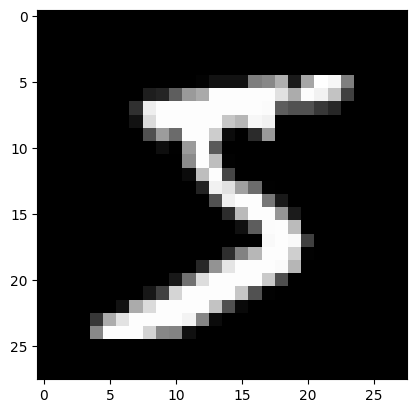

In [8]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

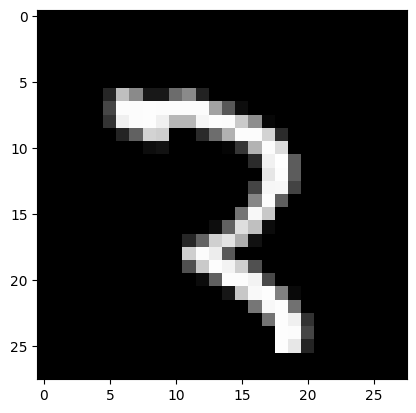

In [19]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

Name:

Register Number:

In [22]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Choose the appropriate parameters
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 29ms/step - accuracy: 0.8459 - loss: 0.4933 - val_accuracy: 0.9741 - val_loss: 0.0798
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 28ms/step - accuracy: 0.9786 - loss: 0.0731 - val_accuracy: 0.9772 - val_loss: 0.0677
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9843 - loss: 0.0515 - val_accuracy: 0.9818 - val_loss: 0.0521
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9880 - loss: 0.0387 - val_accuracy: 0.9837 - val_loss: 0.0485
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9915 - loss: 0.0272 - val_accuracy: 0.9846 - val_loss: 0.0475


In [26]:
metrics = pd.DataFrame(model.history.history)

In [27]:
metrics.head()

,accuracy,loss,val_accuracy,val_loss
0,0.928017,0.238080,0.9741,0.079813
1,0.978900,0.071017,0.9772,0.067712
2,0.984583,0.050747,0.9818,0.052140
3,0.987633,0.039917,0.9837,0.048541
4,0.990567,0.030055,0.9846,0.047543


Ritika S
212221240046


<Axes: >

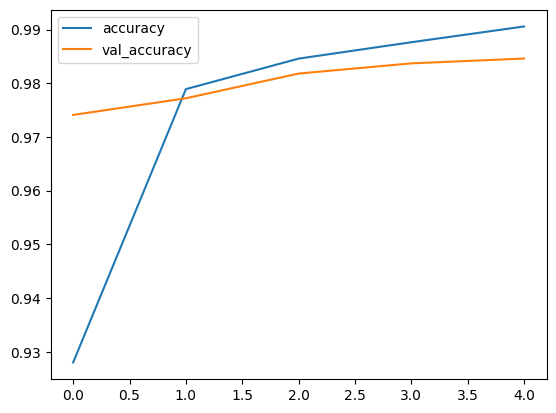

In [28]:
print("Ritika S")
print("212221240046")
metrics[['accuracy','val_accuracy']].plot()

Ritika S
212221240046


<Axes: >

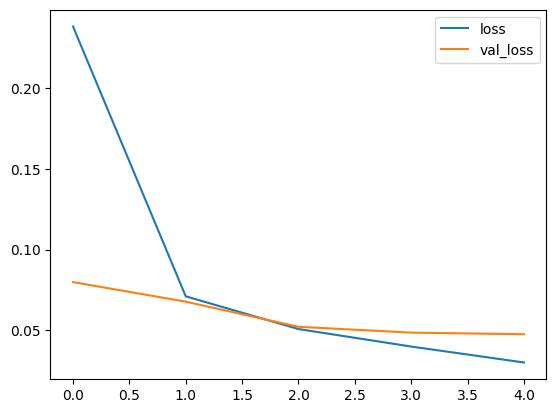

In [29]:
print("Ritika S")
print("212221240046")
metrics[['loss','val_loss']].plot()

In [30]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [31]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1125    4    1    1    0    2    1    1    0]
 [   3    1 1013    0    2    0    2    7    3    1]
 [   1    0    3  994    0    4    1    4    3    0]
 [   1    0    0    0  969    0    2    0    1    9]
 [   4    0    1    4    0  863   10    0    8    2]
 [   3    3    0    0    1    1  947    0    3    0]
 [   1    2    9    0    2    0    0 1013    1    0]
 [   6    0    4    0    0    0    1    3  956    4]
 [   4    0    0    1    7    2    0    4    3  988]]


In [32]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



Ritika S  212221240046


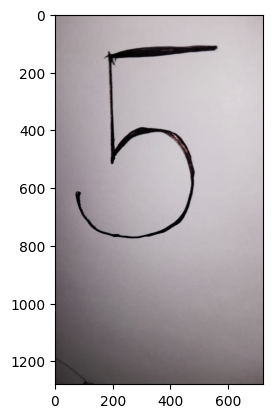

In [34]:
print("Ritika S  212221240046")
img = image.load_img('img5.jpg')
plt.imshow(img)

In [35]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [36]:
img = image.load_img('img5.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [37]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [38]:
print(x_single_prediction)

[6]


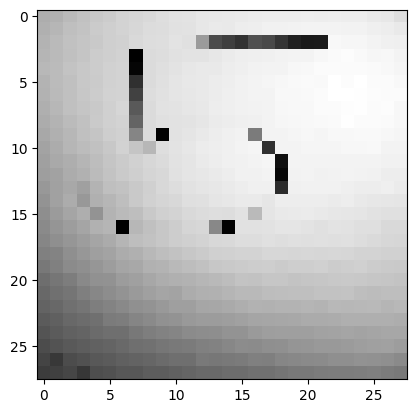

In [39]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [40]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [41]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [42]:
print(x_single_prediction)

[6]
